In [19]:
import os
import matplotlib.pyplot as plt
from paprika.evaluator import Analyze
from openff.evaluator.protocols.paprika.restraints import ApplyRestraints

### Load restraints definition

In [9]:
folder = "working-data/SimulationLayer/8f289f7028e54d54a3ebcec26428f1f0/567d88a69e984998a581d95456ec449d_"

In [14]:
restraints0 = ApplyRestraints.load_restraints(f"{folder}release_generate_restraints_0/restraints.json")

flat_restraints0 = [
    restraint
    for restraint_type in restraints0
    for restraint in restraints0[restraint_type]
]

In [ ]:
restraints1 = ApplyRestraints.load_restraints(f"{folder}release_generate_restraints_1/restraints.json")

flat_restraints1 = [
    restraint
    for restraint_type in restraints1
    for restraint in restraints1[restraint_type]
]

### FE Analysis

In [17]:
results0 = Analyze.compute_phase_free_energy(
    phase="release",
    restraints=flat_restraints0,
    windows_directory=f"{folder}analyze_release_phase_0/windows",
    topology_name="topology.pdb",
    analysis_method="ti-block",
)

In [24]:
results1 = Analyze.compute_phase_free_energy(
    phase="release",
    restraints=flat_restraints1,
    windows_directory=f"{folder}analyze_release_phase_1/windows",
    topology_name="topology.pdb",
    analysis_method="ti-block",
)

### Plot FE

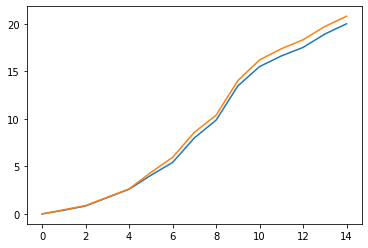

In [25]:
plt.plot(results0['release']['ti-block']['fe_matrix'][0,:])
plt.plot(results1['release']['ti-block']['fe_matrix'][0,:])

In [26]:
import nglview as nv
import pytraj as pt

In [28]:
traj = pt.iterload(
    f"{folder}analyze_release_phase_0/windows/r000/trajectory.dcd",
    top=f"{folder}analyze_release_phase_0/windows/r000/topology.pdb",
)
view = nv.show_pytraj(traj)
view

NGLWidget(max_frame=1999)